In [5]:
import numpy as np
import pandas as pd
from pylab import plt
%matplotlib inline

In [10]:
data = pd.read_csv('../js/results/timeSyncTest-samples1.csv')
mmn_timestamps = pd.read_csv('../js/results/MMN_timestamp1.csv')

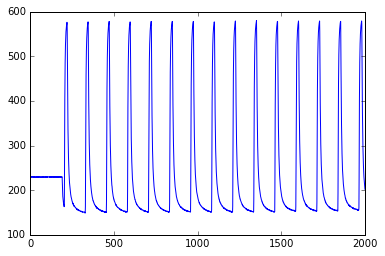

In [12]:
plt.plot(data['Sensor Value'][0:2000])

In [13]:
X = []
window = 100
sfreq = 250.0
times = np.linspace(0, window/sfreq, window)
for i in mmn_timestamps.timestamp.values:
    ix = np.where(data['Time Stamp'] > i)[0]
    if len(ix)>0:
        ix = ix[0]
        X.append(data.loc[ix:(ix + window - 1), 'Sensor Value'])
X = np.array(X)

Now each line below is a stimulus

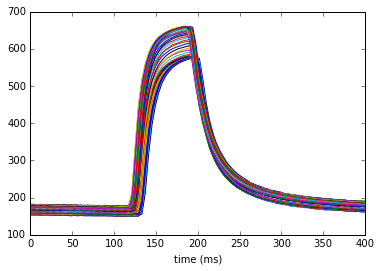

In [14]:
plt.plot(1000*times, X.T);
plt.xlabel('time (ms)')

We can also show it as a picture

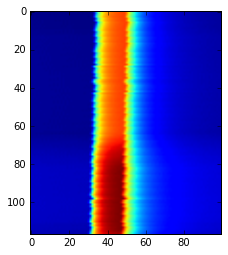

In [15]:
plt.imshow(X)

We can also quantify it, here we detect when the signal > 300 and plot the histogram

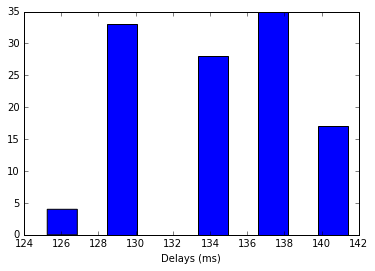

In [16]:
delays  = []
times = np.linspace(0, window/sfreq, window)
for x in X:
    d = np.where(x>300)[0][0]
    delays.append(1000*times[d])
plt.hist(delays)
plt.xlabel('Delays (ms)')

to see the delays from drift

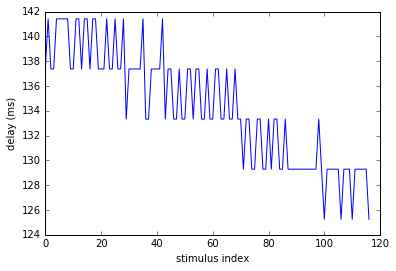

In [17]:
plt.plot(delays)
plt.ylabel('delay (ms)')
plt.xlabel('stimulus index')